In [2]:
import psycopg
import json
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.time import Time
import matplotlib

def init():
    matplotlib.rcParams['xtick.minor.size'] = 6
    matplotlib.rcParams['xtick.major.size'] = 8
    matplotlib.rcParams['ytick.major.size'] = 4
    matplotlib.rcParams['ytick.minor.size'] = 2
    matplotlib.rcParams['lines.linewidth'] = 1.5
    matplotlib.rcParams['axes.linewidth'] = 1.5
    matplotlib.rcParams['font.size']= 16
    matplotlib.rcParams['font.family']= 'sans-serif'
    matplotlib.rcParams['xtick.major.width']= 2.
    matplotlib.rcParams['ytick.major.width']= 2.
    matplotlib.rcParams['ytick.direction']='in'
    matplotlib.rcParams['xtick.direction']='in'

init()

In [3]:
conn = psycopg.connect('dbname=gattini user=gdbguest password=irtda host=gattinidrp.caltech.edu')
cur = conn.cursor()

In [14]:
command = """SELECT * FROM rawframes WHERE jd BETWEEN 2460318.5 AND 2460319.5"""
cur.execute(command)
cands = cur.fetchall()
cands

[(3068665,
  1925,
  datetime.datetime(2024, 1, 8, 8, 55, 52, 181560, tzinfo=backports.zoneinfo.ZoneInfo(key='US/Pacific')),
  '/scr4/phase2operator/survey/raw/20240109//20240109_012714.fits',
  3.817656,
  datetime.datetime(2024, 1, 9, 1, 27, 14, 229000),
  datetime.datetime(2024, 1, 9, 1, 27, 18, 47000),
  -969,
  6400,
  15289,
  17347,
  19719,
  19940,
  64528,
  64535.0,
  -1000.0,
  'arcserv Aug 22 2020 17:30:18',
  'COMMISSIONING',
  -4,
  0.0,
  0.0,
  30.0,
  1652,
  1,
  8,
  331.009083333333,
  9.45094444444444,
  '+44:33:04.5',
  '248:09:19.3',
  'East',
  10.0,
  835.3,
  99.0,
  2.8,
  2.2,
  0.3,
  31.0,
  -1.0,
  129.999,
  307.845,
  104.052,
  60318.055587,
  1.419596,
  0.2277198,
  2460318.56060185,
  4.469955,
  -0.4549242,
  2.191384,
  1.642942,
  8.19539,
  -9.983931,
  4.322392,
  0.7806822,
  1.414497,
  -305.8341,
  265317.2,
  6.117306,
  70.68513,
  '181028a',
  1102.54873710571,
  927.182610665235,
  330.776314027392,
  9.35821145035554,
  2.2360943104660

In [15]:
command = """SELECT column_name FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'rawframes'"""
cur.execute(command)
colnames = cur.fetchall()
colnames = [x[0] for x in colnames]

In [16]:
rawframes = Table(np.array(cands), names=colnames)

In [17]:
sci_frames = rawframes[rawframes['descript']!='COMMISSIONING']
sci_groups = sci_frames[sci_frames['dith_seq']==1]

In [18]:
sci_groups_fields = sci_groups.group_by('field')

/Users/viraj/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/viraj/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in long_scalars
  ret = ret / rcount


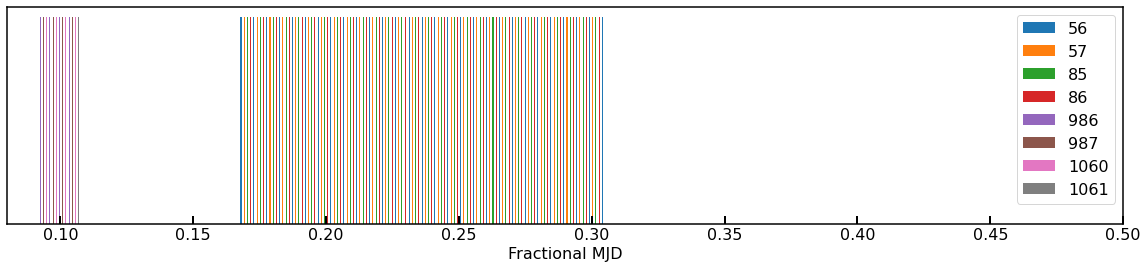

In [21]:
plt.figure(figsize=(20,4))

for grp in sci_groups_fields.groups:
    med_cadence_min = np.median(np.diff(grp['jd']))*24*60
    #print(grp[0]['field'], med_cadence*24*60)
    plt.bar(grp['jd'] - 2460318.5, height=0.1, label=f"{grp[0]['field']}", width=0.0004)
    #print(grp['jd'].min() - 2460317.5)

plt.legend()
plt.xlim(0.08, 0.5)
plt.yticks([])
plt.xlabel('Fractional MJD')
plt.savefig(r'jan8_obs.pdf', bbox_inches='tight')

In [103]:
fld = sci_groups[sci_groups['field']==626]

(array([ 2.,  8.,  0.,  0.,  0., 61.,  1.,  0.,  0.,  2.]),
 array([0.003263880033046007, 0.0035624920390546324, 0.003861104045063257,
        0.004159716051071882, 0.004458328057080507, 0.004756940063089132,
        0.0050555520690977575, 0.005354164075106383, 0.005652776081115007,
        0.005951388087123633, 0.0062500000931322575], dtype=object),
 <BarContainer object of 10 artists>)

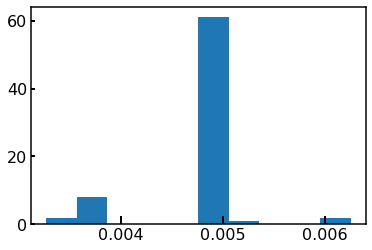

In [152]:
plt.hist(np.diff(fld['jd']))

In [114]:
np.median(np.diff(fld['jd']))*86400/60

6.899997778236866

In [151]:
(64*4 + 6*8*4)/60

7.466666666666667

In [150]:
sci_frames

expid,nightid,datecreate,filename,exptime,datebeg,dateend,data0p,data1p,data10p,data50p,data98p,data99p,data100p,datamax,datamin,program,descript,field,radither,dedither,pointtol,fieldseq,dith_seq,ndithexp,ra_pnt,dec_pnt,alt_pnt,az_pnt,mside,refrtemp,refrpres,envdir,envwin,envwinav,envtem,envhum,envwet,tempfp,tempdewr,templink,tempmjd,airmass,lst,jd,moonra,moondec,moonzd,sunzd,moonphse,moonmag,azimuth,elevatn,moondist,heliocor,skysun,skymoon,skydark,ephemver,crpix1,crpix2,crval1,crval2,cd1_1,cd1_2,cd2_1,cd2_2,ltm1_1,ltm2_2,wat0_001,wat1_001,wat1_002,wat1_003,wat1_004,wat1_005,wat2_001,wat2_002,wat2_003,wat2_004,wat2_005,astromok,nstars,xrms,yrms,xshift,yshift,zmag,smag,sky,ra_cen,dec_cen,rotate,windowht,focus1,focus2,focus3,numcoadds
object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
3065748,1924,2024-01-07 18:34:44.034659-08:00,/scr4/phase2operator/survey/raw/20240108//20240108_022210.fits,8.907864,2024-01-08 02:22:10.079000,2024-01-08 02:22:18.987000,-637,596,1360,1505,1678,1757,64408,64535.0,-1000.0,arcserv Aug 22 2020 17:30:18,DD_20240108_SEQ17_Field555,555,-37.71568,-18.23887,10.0,1248,1,7,91.4122916666667,22.8048611111111,+32:12:40.5,082:18:24.8,West,10.0,835.3,178.0,2.3,3.6,-2.7,60.0,-1.0,130.002,304.167,102.178,60317.097253,1.875202,0.4510114,2460317.59877315,4.226945,-0.4036583,2.558348,1.835056,14.58717,-10.60993,1.431302,0.5610026,2.67199,471.8682,1204.008,29.61341,85.33721,181028a,1106.5802388825,1013.77542008927,91.1339861375218,22.8083213635388,-5.1210678589609e-05,-0.0024261797638404,-0.0024250715737751,5.26234819253167e-05,1.0,1.0,system=image,"wtype=tnx axtype=ra lngcor = ""3. 3. 4. 2. -2.48357191040902 2.436560",301972236 -2.280621519989043 2.687663966232398 7.855744273643988E-6,2.030053973586657E-4 -3.264555683527681E-5 2.707354405695266E-5 2.19,9102881302507E-5 1.157832491059019E-5 -8.804271919668178E-6 -2.03704,"0795623242E-4 4.298675523253203E-6 ""","wtype=tnx axtype=dec latcor = ""3. 4. 3. 2. -2.48357191040902 2.43656",0301972236 -2.280621519989043 2.687663966232398 2.879298504345684E-4,3.195300128599498E-5 -2.811954243096759E-5 -3.876988401902790E-6 2.,676094045200249E-4 3.393109554858741E-6 -1.781595285402751E-4 -1.063,"090228908416E-4 2.310883536689955E-5 """,1.0,139,0.357,0.296,82.63,-10.21,18.37,-1.459,1505.0,1.590198,0.4015907,3.16299911686571,70.0,0.0,0.0,0.0,7
3065749,1924,2024-01-07 18:34:44.951379-08:00,/scr4/phase2operator/survey/raw/20240108//20240108_022224.fits,8.907864,2024-01-08 02:22:24.077000,2024-01-08 02:22:32.985000,-643,593,1358,1499,1667,1748,64387,64535.0,-1000.0,arcserv Aug 22 2020 17:30:18,DD_20240108_SEQ17_Field555,555,154.5999,252.399,10.0,1248,2,7,91.4600416666667,22.8755,+32:15:04.8,082:14:13.9,West,10.0,835.3,178.0,2.3,3.6,-2.7,60.0,-1.0,130.002,304.167,102.178,60317.097253,1.873163,0.4520324,2460317.59893519,4.226993,-0.4036561,2.559151,1.835875,14.58557,-10.60981,1.430069,0.5616913,2.671391,471.9746,1202.416,29.57972,85.27886,181028a,1106.79793734768,1014.04977841685,91.1815932012749,22.8790530041733,-5.1230594453627e-05,-0.0024265345917862,-0.0024251807972399,5.25072866696479e-05,1.0,1.0,system=image,"wtype=tnx axtype=ra lngcor = ""3. 3. 4. 2. -2.507786230872109 2.39306",9949469206 -2.277252308699817 2.659511696111386 -9.551578704883784E-,5 1.263776237503942E-4 2.343136936123060E-5 2.514779927821381E-5 1.4,94059558307156E-5 -4.426667072452263E-6 3.4424878

In [6]:
Time('2024-01-10').mjd

60319.0